In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16,6)
plt.rc('font',family='serif')
plt.rcParams.update({'font.size': 24})
plt.rc('text', usetex=True)
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'

### Figure 1

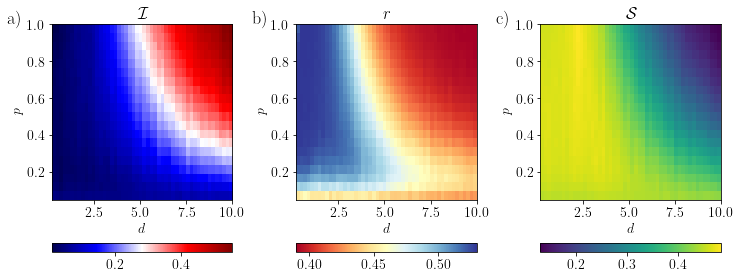

In [2]:
mpl.rcParams['figure.figsize'] = (12,8)
plt.rcParams.update({'font.size': 14})
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Paired.colors)
fig, axes = plt.subplots(1,3)
ax1,ax2,ax3 = axes

n=14
delta = 1.0
reps = 512

with h5py.File('avg-XXZ/avg-n%s-Jz%.2f-reps%s.h5' %(n,delta,reps),'r') as hf:
    ent2d = np.array(hf.get('Sent'))
    imb2d = np.array(hf.get('imb'))
    rlist2d = np.array(hf.get('rlist'))

imb = ax1.imshow(imb2d,origin='lower',aspect='10',cmap='seismic',extent=(0.2,10,0.05,1))
fig.colorbar(imb, orientation="horizontal", pad=0.1,ax=ax1)
ax1.set(title=r'$\mathcal{I}$')
ax1.set(xlabel=r'$d$',ylabel=r'$p$')

r = ax2.imshow(rlist2d,origin='lower',aspect='10',cmap='RdYlBu',extent=(0.2,10,0.05,1))
fig.colorbar(r, orientation="horizontal", pad=0.1,ax=ax2)
ax2.set(xlabel=r'$d$',ylabel=r'$p$')
ax2.set(title=r'$r$')

ent = ax3.imshow(ent2d,origin='lower',aspect='10',extent=(0.2,10,0.05,1))
fig.colorbar(ent, orientation="horizontal", pad=0.1,ax=ax3)
ax3.set(xlabel=r'$d$',ylabel=r'$p$')
ax3.set(title=r'$\mathcal{S}$')

ax1.text(-2.2,1.0,r'a)',fontsize=18)
ax2.text(-2.2,1.0,r'b)',fontsize=18)
ax3.text(-2.2,1.0,r'c)',fontsize=18)
plt.subplots_adjust(hspace=0.,wspace=0.35)
plt.savefig('Fig1.pdf',dpi=300,bbox_inches='tight')
plt.show()
plt.close() 

### Figure 2

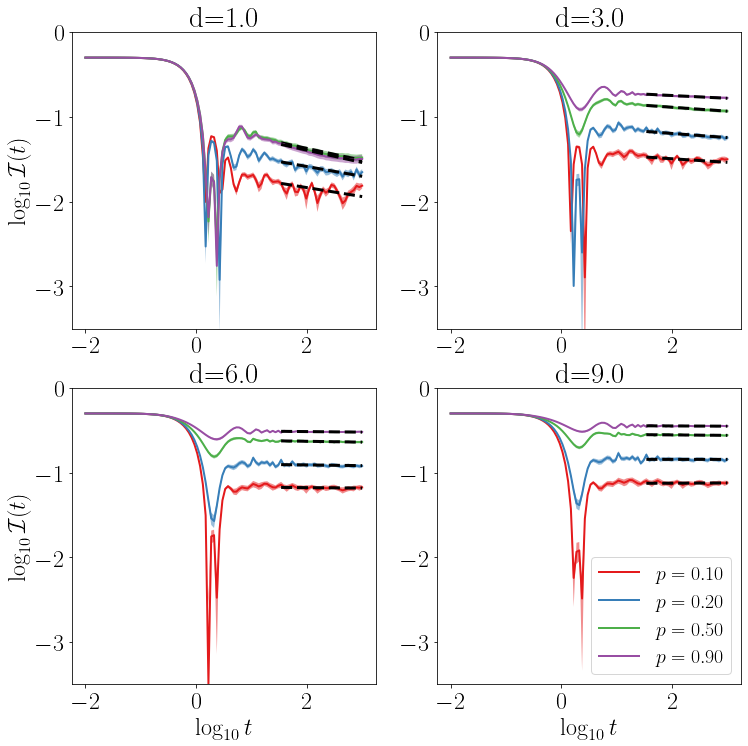

In [3]:
from scipy.ndimage import gaussian_filter as gf
plt.rcParams.update({'font.size': 24})
mpl.rcParams['figure.figsize'] = (12,12)
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Set1.colors)
fig, axes = plt.subplots(2,2)
ax1,ax2 = axes[0]
bx1,bx2 = axes[1]
axlist=[ax1,ax2,bx1,bx2]

reps = 1024
dc = 0
for d in [1.0,3.0,6.0,9.0]:
    ax = axlist[dc]
    for L in [16]:
        for p in [0.1,0.2,0.5,0.9]:
            imblist = np.zeros((reps,100))
            imb_var_list = np.zeros(100)
            imb_var_list2 = np.zeros(100)
            for rep in range(reps):
                with h5py.File('data/dataN%s/dyn-d%.2f-Jz%.2f-p%.2f-rep%s.h5' %(L,d,1.0,p,rep),'r') as hf:
                    zlist = np.array(hf.get('imb'))
                    tlist = np.array(hf.get('tlist'))
                    imblist[rep] = zlist
            
            if p == 0.1:
                imblist2 = gf(np.mean(imblist,axis=0),1)
            else:
                imblist2 = np.mean(imblist,axis=0)
                
            varlist = np.var(imblist,axis=0)
            imblist = imblist2
            for v in range(len(varlist)):
                imb_var_list[v] = imblist[v]+(varlist[v])
                imb_var_list2[v] = imblist[v]-(varlist[v])

            ax.plot(np.log10(tlist),np.log10(np.abs(imblist)),'-',label=r'$p = %.2f$' %p,linewidth=2)
            ax.fill_between(np.log10(tlist),np.log10(np.abs(imb_var_list2)),np.log10(np.abs(imb_var_list)),alpha=0.5)

            fit = np.polyfit(np.log10(tlist[-50::]),np.log10(np.abs(imblist)[-50::]),1)
            ax.plot(np.log10(tlist[-30::]),[fit[-1]+(fit[0])*t for t in np.log10(tlist[-30::])],'k--',linewidth=3)
            ax.set(title=r'd=%.1f' %d,ylim=(-3.5,0))
            
    dc += 1 
    
ax1.set(ylabel=r'$\log_{10}\mathcal{I}(t)$')
bx1.set(ylabel=r'$\log_{10}\mathcal{I}(t)$')
bx1.set(xlabel=r'$\log_{10}t$')
bx2.set(xlabel=r'$\log_{10}t$')
bx2.legend(loc='lower right',fontsize=20)
plt.savefig('Fig2.pdf',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

### Figure 3

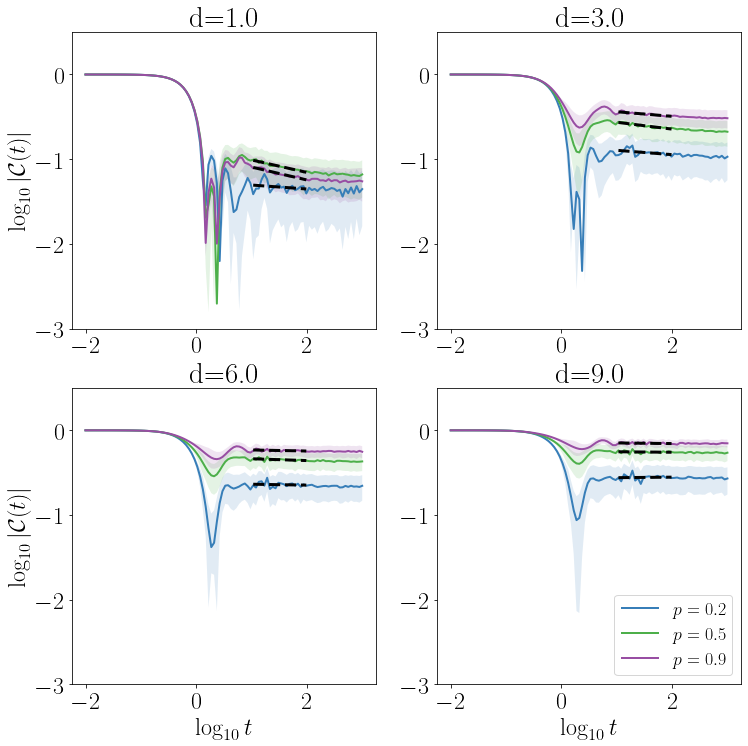

In [4]:
from scipy.ndimage import gaussian_filter as gf
mpl.rcParams['figure.figsize'] = (12,12)
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Set1.colors)

fig, axes = plt.subplots(2,2)
ax1,ax2 = axes[0]
bx1,bx2 = axes[1]
axlist=[ax1,ax2,bx1,bx2]

reps = 1024
dc = 0
for d in [1.0,3.0,6.0,9.0]:
    ax = axlist[dc]
    for L in [16]:
        for p in [0.1,0.2,0.5,0.9]:
            corrlist = np.zeros((reps,100))
            cr_var_list = np.zeros(100)
            cr_var_list2 = np.zeros(100)
            for rep in range(reps):
                with h5py.File('data/dataN%s/dyn-d%.2f-Jz%.2f-p%.2f-rep%s.h5' %(L,d,1.0,p,rep),'r') as hf:
                    corr = np.array(hf.get('corr'))
                    tlist = np.array(hf.get('tlist'))
                    corrlist[rep] = corr.real

            if p == 0.1:
                corrlist2 = gf(np.mean(corrlist,axis=0),1)
            else:
                corrlist2 = np.mean(corrlist,axis=0)
                
            varlist = (np.var(np.abs(corrlist),axis=0))
            corrlist = corrlist2
            for v in range(len(varlist)):
                cr_var_list[v] = max(np.log10(np.abs(corrlist[v]+(varlist[v]))),np.log10(np.abs(corrlist[v]-(varlist[v]))))
                cr_var_list2[v] = min(np.log10(np.abs(corrlist[v]+(varlist[v]))),np.log10(np.abs(corrlist[v]-(varlist[v]))))
            if p == 0.1:
                cr_var_list = gf(cr_var_list,1)
                cr_var_list2 = gf(cr_var_list2,1)

            if p != 0.1:
                ax.plot(np.log10(tlist),np.log10(np.abs(corrlist)),'-',label=r'$p = %s$' %p,linewidth=2)
                ax.fill_between(np.log10(tlist),cr_var_list2,cr_var_list,alpha=0.15)
    
            if p == 0.1:
                ax.plot(np.log10(tlist),np.log10(np.abs(corrlist)),'-',linewidth=2,alpha=0.)
                ax.fill_between(np.log10(tlist),cr_var_list2,cr_var_list,alpha=0.)


            if p != 0.1:
                fit = np.polyfit(np.log10(tlist[-40:-20]),np.log10(np.abs(corrlist)[-40:-20]),1)
                ax.plot(np.log10(tlist[-40:-20]),[fit[-1]+(fit[0])*t for t in np.log10(tlist[-40:-20])],'k--',linewidth=3)

            ax.set(title=r'd=%.1f' %d)
            ax.set(ylim=(-3,0.5))
            
    dc += 1 
    
ax1.set(ylabel=r'$\log_{10}|\mathcal{C}(t)|$')
bx1.set(ylabel=r'$\log_{10}|\mathcal{C}(t)|$')
bx1.set(xlabel=r'$\log_{10}t$')
bx2.set(xlabel=r'$\log_{10}t$')
bx2.legend(loc='lower right',fontsize=18)
plt.savefig('Fig3.pdf',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

### Figure 4

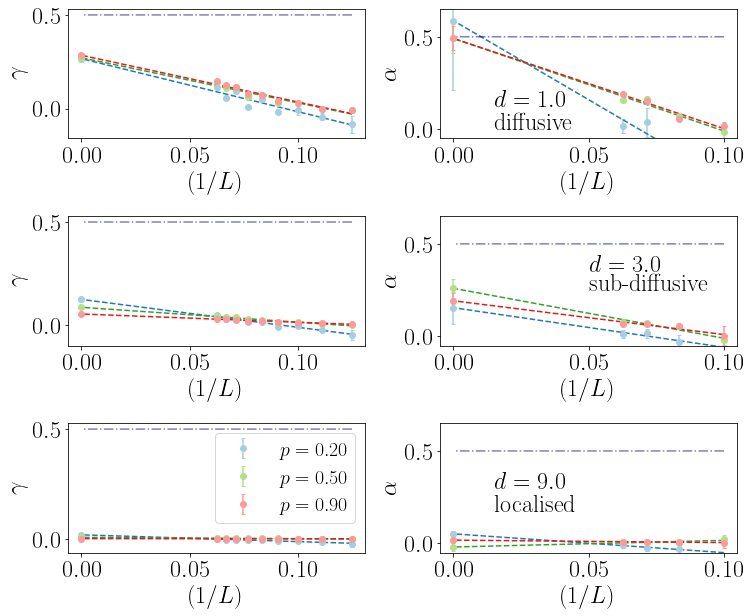

In [5]:
from scipy.ndimage import gaussian_filter as gf

mpl.rcParams['figure.figsize'] = (12,10)
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Paired.colors)
fig, axes = plt.subplots(3,2)
ax1,ax2 = axes[0]
bx1,bx2 = axes[1]
cx1,cx2 = axes[2]

axlist = [[ax1,ax2],[bx1,bx2],[cx1,cx2]]
reps = 1024
Llist = [8,10,12,14,16]
    
axcount = 0
for d in [1.0,3.0,9.0]:
    axes = axlist[axcount]
    for p in [0.2,0.5,0.9]:
        Llist = [8,9,10,11,12,13,14,15,16]
        count = 0
        alist = np.zeros((len(Llist)))
        errlist = np.zeros((len(Llist)))
        for L in Llist:
            if L == 8 or L == 9 or L == 10:
                reps = 4096
            elif L == 12 or L == 14:
                reps = 2048
            elif L == 11 or L == 13 or L == 15 or L == 16:
                reps = 1024
            imblist = np.zeros((reps,100))
            for rep in range(reps):
                with h5py.File('data/dataN%s/dyn-d%.2f-Jz%.2f-p%.2f-rep%s.h5' %(L,d,1.0,p,rep),'r') as hf:
                    zlist = np.array(hf.get('imb'))
                    tlist = np.array(hf.get('tlist'))
                    imblist[rep] = zlist

            imblist = np.mean(imblist,axis=0)
            fit,cov = np.polyfit(np.log10(tlist[-50::]),np.log10(np.abs(imblist)[-50::]),1,cov=True)
            alist[count] = -fit[0]
            errlist[count] = np.sqrt(np.diag(cov)[0])
            count += 1

        fit = np.polyfit(([1/L for L in Llist]),alist,1)
        axes[0].errorbar((np.concatenate(([0],[1/L for L in Llist]))),np.concatenate(([[fit[-1]],alist])),yerr=np.concatenate(([np.sqrt(np.diag(cov)[-1])],errlist)),fmt='o',capsize=2.0,label=r'$p = %.2f$' %p)
        axes[0].plot(([1/L for L in range(8,10000)]),[fit[-1]+(fit[0])*t for t in ([1/L for L in range(8,10000)])],'--')

    axes[0].plot(([1/L for L in range(8,10000)]),0.5*np.ones(9992),'-.',color='navy',alpha=0.5)
    axes[0].set(xlabel=r'$(1/L)$',ylabel=r'$\gamma$')
    
    Llist = [10,12,14,16]
    for p in [0.2,0.5,0.9]:
        if p == 0.2:
            Llist=[12,14,16]
        else:
            Llist = [10,12,14,16]
        count = 0
        alist = np.zeros((len(Llist)))
        errlist = np.zeros((len(Llist)))
        for L in Llist:
            if L == 8 or L == 9 or L == 10:
                reps = 4096
            elif L == 12 or L == 14:
                reps = 2048
            elif L == 11 or L == 13 or L == 15 or L == 16:
                reps = 1024
            clist = np.zeros((reps,100))
            for rep in range(reps):
                with h5py.File('data/dataN%s/dyn-d%.2f-Jz%.2f-p%.2f-rep%s.h5' %(L,d,1.0,p,rep),'r') as hf:
                    zlist = np.array(hf.get('corr'))
                    tlist = np.array(hf.get('tlist'))
                    clist[rep] = zlist.real

            clist = np.mean(clist,axis=0)
            
            if L < 12:
                fit,cov = np.polyfit(np.log10(tlist[-50:-35]),np.log10(np.abs(clist)[-50:-35]),1,cov=True)
            else:
                fit,cov = np.polyfit(np.log10(tlist[-45:-20]),np.log10(np.abs(clist)[-45:-20]),1,cov=True)
            alist[count] = -fit[0]
            errlist[count] = np.sqrt(np.diag(cov)[0])
            count += 1

        fit,cov = np.polyfit(([1/L for L in Llist]),alist,1,cov=True)
        axes[1].errorbar((np.concatenate(([0],[1/L for L in Llist]))),np.concatenate(([[fit[-1]],alist])),yerr=np.concatenate(([np.sqrt(np.diag(cov)[-1])],errlist)),fmt='o',capsize=2.0,label=r'$p = %.2f$' %p)
        axes[1].plot(([1/L for L in range(10,100000)]),[fit[-1]+(fit[0])*t for t in ([1/L for L in range(10,100000)])],'--')

    axes[1].plot(([1/L for L in range(10,10000)]),0.5*np.ones(9990),'-.',color='navy',alpha=0.5)
    axes[1].set(xlabel=r'$(1/L)$',ylabel=r'$\alpha$',ylim=(-0.05,0.65))
    
    axcount += 1

axlist[-1][0].legend(loc='upper right',fontsize=20)
plt.subplots_adjust(hspace=0.6,wspace=0.25)
axlist[0][1].text(0.015,0.125,r'$d=1.0$')
axlist[0][1].text(0.015,0.0,r'diffusive')

axlist[1][1].text(0.05,0.35,r'$d=3.0$')
axlist[1][1].text(0.05,0.25,r'sub-diffusive')

axlist[2][1].text(0.015,0.3,r'$d=9.0$')
axlist[2][1].text(0.015,0.175,r'localised')
plt.savefig('Fig4.pdf',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

### Figure 5

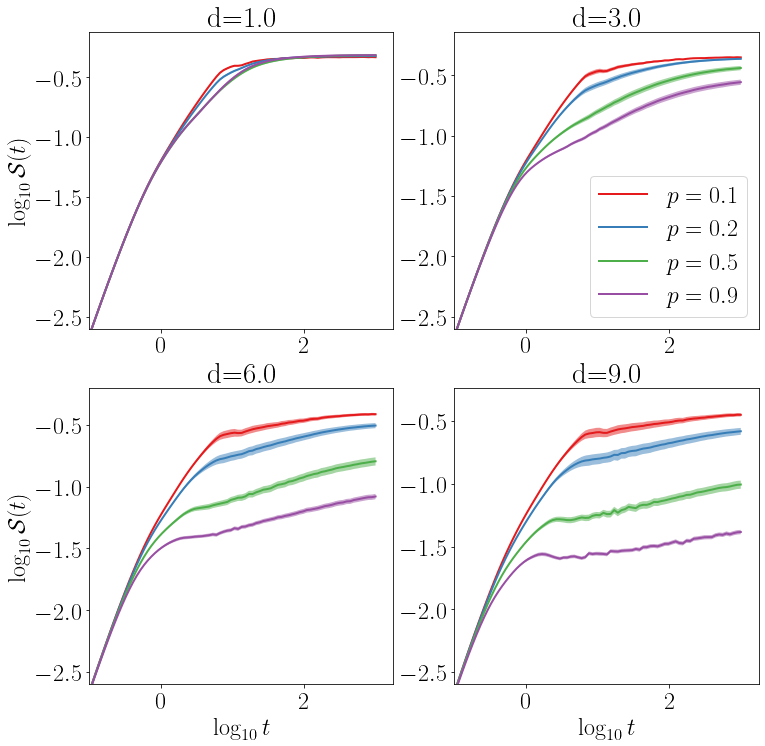

In [6]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,12)
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Set1.colors)

fig, axes = plt.subplots(2,2)
ax1,ax2 = axes[0]
bx1,bx2 = axes[1]
axlist=[ax1,ax2,bx1,bx2]

reps = 1024
dc = 0
for d in [1.0,3.0,6.0,9.0]:
    ax = axlist[dc]
    for L in [16]:
        for p in [0.1,0.2,0.5,0.9]:
            entlist = np.zeros((reps,100))
            cr_var_list = np.zeros(100)
            cr_var_list2 = np.zeros(100)
            for rep in range(reps):
                with h5py.File('data/dataN%s/dyn-d%.2f-Jz%.2f-p%.2f-rep%s.h5' %(L,d,1.0,p,rep),'r') as hf:
                    ent = np.array(hf.get('ent'))
                    tlist = np.array(hf.get('tlist'))
                    entlist[rep] = ent.real

            entlist2 = np.mean(entlist,axis=0)
            varlist = np.var(entlist,axis=0)
            entlist = entlist2
            for v in range(len(varlist)):
                cr_var_list[v] = (entlist[v])+(varlist[v])
                cr_var_list2[v] = (entlist[v])-(varlist[v])

            ax.plot(np.log10(tlist),np.log10(np.abs(entlist)),'-',label=r'$p = %s$' %p,linewidth=2)
            ax.fill_between(np.log10(tlist),np.log10(np.abs(cr_var_list2)),np.log10(np.abs(cr_var_list)),alpha=0.5)

            ax.set(ylim=-2.6,xlim=-1,title=r'd=%.1f' %d)

    dc += 1 

ax1.set(ylabel=r'$\log_{10}\mathcal{S}(t)$')
bx1.set(ylabel=r'$\log_{10}\mathcal{S}(t)$')
bx1.set(xlabel=r'$\log_{10}t$')
bx2.set(xlabel=r'$\log_{10}t$')
ax2.legend(loc='lower right')
plt.savefig('Fig5.pdf',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

### Figure 6

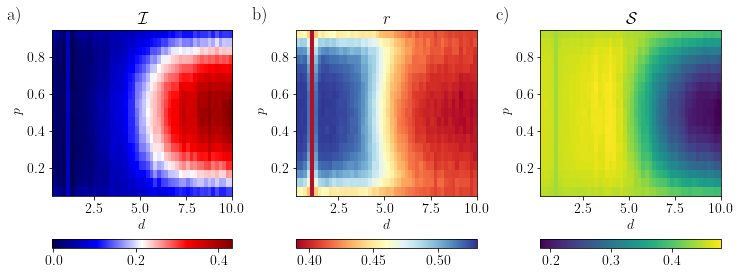

In [7]:
mpl.rcParams['figure.figsize'] = (12,8)
plt.rcParams.update({'font.size': 14})
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Paired.colors)
fig, axes = plt.subplots(1,3)
ax1,ax2,ax3 = axes

n=14
delta = 1.0
reps = 512

with h5py.File('avg-XXZ/avg2-n%s-Jz%.2f-reps%s.h5' %(n,delta,reps),'r') as hf:
    ent2d = np.array(hf.get('Sent'))[0:-1]
    imb2d = np.array(hf.get('imb'))[0:-1]
    rlist2d = np.array(hf.get('rlist'))[0:-1]
    
imb = ax1.imshow(imb2d,origin='lower',aspect='10',cmap='seismic',extent=(0.2,10,0.05,0.95))
fig.colorbar(imb, orientation="horizontal", pad=0.1,ax=ax1)
ax1.set(title=r'$\mathcal{I}$')
ax1.set(xlabel=r'$d$',ylabel=r'$p$')

r = ax2.imshow(rlist2d,origin='lower',aspect='10',cmap='RdYlBu',extent=(0.2,10,0.05,0.95))
fig.colorbar(r, orientation="horizontal", pad=0.1,ax=ax2)
ax2.set(xlabel=r'$d$',ylabel=r'$p$')
ax2.set(title=r'$r$')

ent = ax3.imshow(ent2d,origin='lower',aspect='10',extent=(0.2,10,0.05,0.95))
fig.colorbar(ent, orientation="horizontal", pad=0.1,ax=ax3)
ax3.set(xlabel=r'$d$',ylabel=r'$p$')
ax3.set(title=r'$\mathcal{S}$')

ax1.text(-2.2,1.0,r'a)',fontsize=18)
ax2.text(-2.2,1.0,r'b)',fontsize=18)
ax3.text(-2.2,1.0,r'c)',fontsize=18)

plt.subplots_adjust(hspace=0.,wspace=0.35)
plt.savefig('Fig6.pdf',dpi=300,bbox_inches='tight')
plt.show()
plt.close() 

### Figure 7

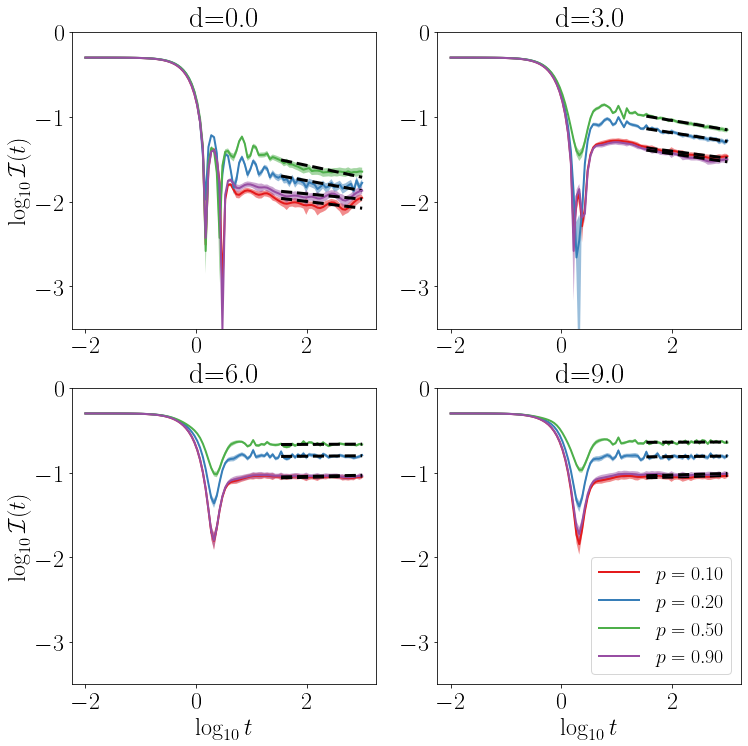

In [8]:
from scipy.ndimage import gaussian_filter as gf
plt.rcParams.update({'font.size': 24})
mpl.rcParams['figure.figsize'] = (12,12)
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Set1.colors)
fig, axes = plt.subplots(2,2)
ax1,ax2 = axes[0]
bx1,bx2 = axes[1]
axlist=[ax1,ax2,bx1,bx2]

reps = 1024
dc = 0
for d in [0.0,3.0,6.0,9.0]:
    ax = axlist[dc]
    for L in [16]:
        for p in [0.1,0.2,0.5,0.9]:
            imblist = np.zeros((reps,100))
            imb_var_list = np.zeros(100)
            imb_var_list2 = np.zeros(100)
            for rep in range(reps):
                with h5py.File('data2/dataN%s/dyn-d%.2f-Jz%.2f-p%.2f-rep%s.h5' %(L,d,1.0,p,rep),'r') as hf:
                    zlist = np.array(hf.get('imb'))
                    tlist = np.array(hf.get('tlist'))
                    imblist[rep] = zlist
            
            if p == 0.1 or p == 0.9 or d == 1.0:
                imblist2 = gf(np.mean(imblist,axis=0),2)
            else:
                imblist2 = np.mean(imblist,axis=0)
                
            varlist = np.var(imblist,axis=0)
            imblist = imblist2
            for v in range(len(varlist)):
                imb_var_list[v] = imblist[v]+(varlist[v])
                imb_var_list2[v] = imblist[v]-(varlist[v])

            ax.plot(np.log10(tlist),np.log10(np.abs(imblist)),'-',label=r'$p = %.2f$' %p,linewidth=2)
            ax.fill_between(np.log10(tlist),np.log10(np.abs(imb_var_list2)),np.log10(np.abs(imb_var_list)),alpha=0.5)

            if d != 1.0:
                fit = np.polyfit(np.log10(tlist[-50::]),np.log10(np.abs(imblist)[-50::]),1)
                ax.plot(np.log10(tlist[-30::]),[fit[-1]+(fit[0])*t for t in np.log10(tlist[-30::])],'k--',linewidth=3)
            ax.set(title=r'd=%.1f' %d,ylim=(-3.5,0))
            
    dc += 1 
    
ax1.set(ylabel=r'$\log_{10}\mathcal{I}(t)$')
bx1.set(ylabel=r'$\log_{10}\mathcal{I}(t)$')
bx1.set(xlabel=r'$\log_{10}t$')
bx2.set(xlabel=r'$\log_{10}t$')
bx2.legend(loc='lower right',fontsize=20)
plt.savefig('Fig7.pdf',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

### Figure 8

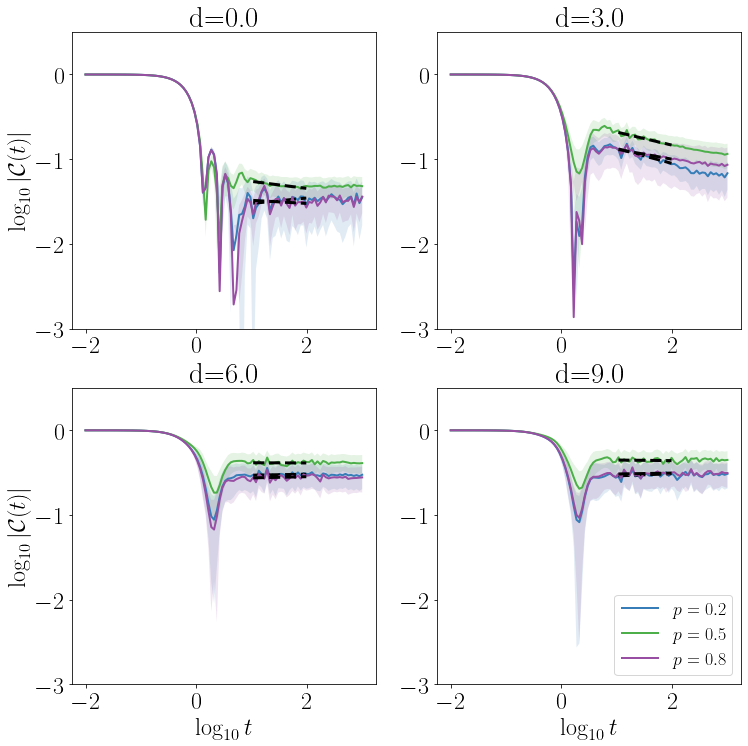

In [9]:
import matplotlib as mpl
from scipy.ndimage import gaussian_filter as gf
mpl.rcParams['figure.figsize'] = (12,12)
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Set1.colors)

fig, axes = plt.subplots(2,2)
ax1,ax2 = axes[0]
bx1,bx2 = axes[1]
axlist=[ax1,ax2,bx1,bx2]

reps = 1024
dc = 0
for d in [0.0,3.0,6.0,9.0]:
    ax = axlist[dc]
    for L in [16]:
        for p in [0.1,0.2,0.5,0.8,0.9]:
            corrlist = np.zeros((reps,100))
            cr_var_list = np.zeros(100)
            cr_var_list2 = np.zeros(100)
            for rep in range(reps):
                with h5py.File('data2/dataN%s/dyn-d%.2f-Jz%.2f-p%.2f-rep%s.h5' %(L,d,1.0,p,rep),'r') as hf:
                    corr = np.array(hf.get('corr'))
                    tlist = np.array(hf.get('tlist'))
                    corrlist[rep] = corr.real

            if p == 0.1 or d==1.0:
                corrlist2 = gf(np.mean(corrlist,axis=0),2)
            else:
                corrlist2 = np.mean(corrlist,axis=0)
                
            varlist = (np.var(np.abs(corrlist),axis=0))
            corrlist = corrlist2
            for v in range(len(varlist)):
                cr_var_list[v] = max(np.log10(np.abs(corrlist[v]+(varlist[v]))),np.log10(np.abs(corrlist[v]-(varlist[v]))))
                cr_var_list2[v] = min(np.log10(np.abs(corrlist[v]+(varlist[v]))),np.log10(np.abs(corrlist[v]-(varlist[v]))))
            if p == 0.1:
                cr_var_list = gf(cr_var_list,1)
                cr_var_list2 = gf(cr_var_list2,1)

            if p != 0.1 and p != 0.9:
                ax.plot(np.log10(tlist),np.log10(np.abs(corrlist)),'-',label=r'$p = %s$' %p,linewidth=2)
                ax.fill_between(np.log10(tlist),cr_var_list2,cr_var_list,alpha=0.15)
    
            if p == 0.1 or p == 0.9:
                ax.plot(np.log10(tlist),np.log10(np.abs(corrlist)),'-',linewidth=2,alpha=0.)
                ax.fill_between(np.log10(tlist),cr_var_list2,cr_var_list,alpha=0.)


            if p != 0.1 and p != 0.9 and d != 1.0:
                fit = np.polyfit(np.log10(tlist[-40:-20]),np.log10(np.abs(corrlist)[-40:-20]),1)
                ax.plot(np.log10(tlist[-40:-20]),[fit[-1]+(fit[0])*t for t in np.log10(tlist[-40:-20])],'k--',linewidth=3)

            ax.set(title=r'd=%.1f' %d)
            ax.set(ylim=(-3,0.5))
            
    dc += 1 
    
ax1.set(ylabel=r'$\log_{10}|\mathcal{C}(t)|$')
bx1.set(ylabel=r'$\log_{10}|\mathcal{C}(t)|$')
bx1.set(xlabel=r'$\log_{10}t$')
bx2.set(xlabel=r'$\log_{10}t$')
bx2.legend(loc='lower right',fontsize=18)
plt.savefig('Fig8.pdf',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

### Figure 9

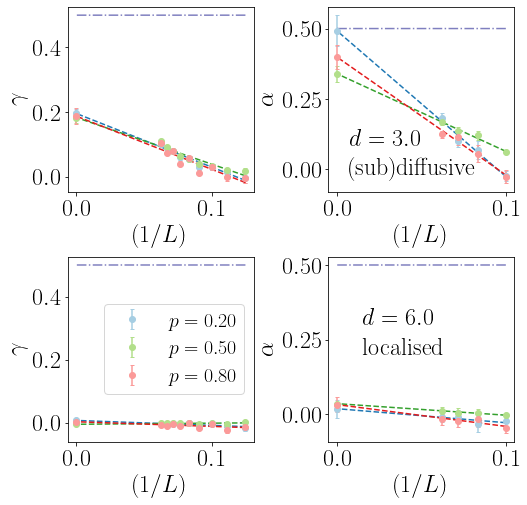

In [10]:
from scipy.ndimage import gaussian_filter as gf

mpl.rcParams['figure.figsize'] = (8,8)
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Paired.colors)
fig, axes = plt.subplots(2,2)
ax1,ax2 = axes[0]
bx1,bx2 = axes[1]

axlist = [[ax1,ax2],[bx1,bx2]]
reps = 1024
Llist = [8,10,12,14,16]
    
axcount = 0
for d in [3.0,6.0]:
    axes = axlist[axcount]
    for p in [0.2,0.5,0.8]:
        Llist = [8,9,10,11,12,13,14,15,16]
        count = 0
        alist = np.zeros((len(Llist)))
        errlist = np.zeros((len(Llist)))
        for L in Llist:
            if L == 8 or L == 9 or L == 10:
                reps = 4096
            elif L == 11 or L == 12 or L == 14:
                reps = 2048
            elif L == 13 or L == 15 or L == 16:
                reps = 1024
            imblist = np.zeros((reps,100))
            for rep in range(reps):
                with h5py.File('data2/dataN%s/dyn-d%.2f-Jz%.2f-p%.2f-rep%s.h5' %(L,d,1.0,p,rep),'r') as hf:
                    zlist = np.array(hf.get('imb'))
                    tlist = np.array(hf.get('tlist'))

                    imblist[rep] = zlist

            imblist = np.mean(imblist,axis=0)
            fit,cov = np.polyfit(np.log10(tlist[-50::]),np.log10(np.abs(imblist)[-50::]),1,cov=True)
            alist[count] = -fit[0]
            errlist[count] = np.sqrt(np.diag(cov)[0])
            count += 1

        fit,cov = np.polyfit(([1/L for L in Llist]),alist,1,cov=True)
        axes[0].errorbar((np.concatenate(([0],[1/L for L in Llist]))),np.concatenate(([[fit[-1]],alist])),yerr=np.concatenate(([np.sqrt(np.diag(cov)[-1])],errlist)),fmt='o',capsize=2.0,label=r'$p = %.2f$' %p)
        axes[0].plot(([1/L for L in range(8,10000)]),[fit[-1]+(fit[0])*t for t in ([1/L for L in range(8,10000)])],'--')

    axes[0].plot(([1/L for L in range(8,10000)]),0.5*np.ones(9992),'-.',color='navy',alpha=0.5)
    axes[0].set(xlabel=r'$(1/L)$',ylabel=r'$\gamma$')

    Llist = [10,12,14,16]
    for p in [0.2,0.5,0.8]:
        count = 0
        alist = np.zeros((len(Llist)))
        errlist = np.zeros((len(Llist)))
        for L in Llist:
            if L == 8 or L == 9 or L == 10:
                reps = 4096
            elif L == 11 or L == 12 or L == 14:
                reps = 2048
            elif L == 13 or L == 15 or L == 16:
                reps = 1024
                
            clist = np.zeros((reps,100))
            for rep in range(reps):
                with h5py.File('data2/dataN%s/dyn-d%.2f-Jz%.2f-p%.2f-rep%s.h5' %(L,d,1.0,p,rep),'r') as hf:
                    zlist = np.array(hf.get('corr'))
                    tlist = np.array(hf.get('tlist'))

                    clist[rep] = zlist.real

            clist = np.mean(clist,axis=0)
            
            if L < 12:
                clist = gf(clist,1)

            if d == 9.0:
                fit,cov = np.polyfit(np.log10(tlist[-45:-10]),np.log10(np.abs(clist)[-45:-10]),1,cov=True)
            else:
                fit,cov = np.polyfit(np.log10(tlist[-45:-20]),np.log10(np.abs(clist)[-45:-20]),1,cov=True)
            alist[count] = -fit[0]
            errlist[count] = np.sqrt(np.diag(cov)[0])
            count += 1

        fit,cov = np.polyfit(([1/L for L in Llist]),alist,1,cov=True)
        axes[1].errorbar((np.concatenate(([0],[1/L for L in Llist]))),np.concatenate(([[fit[-1]],alist])),yerr=np.concatenate(([np.sqrt(np.diag(cov)[-1])],errlist)),fmt='o',capsize=2.0,label=r'$p = %.2f$' %p)
        axes[1].plot(([1/L for L in range(10,10000)]),[fit[-1]+(fit[0])*t for t in ([1/L for L in range(10,10000)])],'--')

    axes[1].plot(([1/L for L in range(10,10000)]),0.5*np.ones(9990),'-.',color='navy',alpha=0.5)
    axes[1].set(xlabel=r'$(1/L)$',ylabel=r'$\alpha$')

    axcount += 1

axlist[-1][0].legend(loc='center right',fontsize=20)
plt.subplots_adjust(hspace=0.35,wspace=0.4)
axlist[0][1].text(0.007,0.085,r'$d=3.0$')
axlist[0][1].text(0.007,-0.02,r'(sub)diffusive')

axlist[1][1].text(0.015,0.3,r'$d=6.0$')
axlist[1][1].text(0.015,0.2,r'localised')

plt.savefig('Fig9.pdf',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

### Figure 10

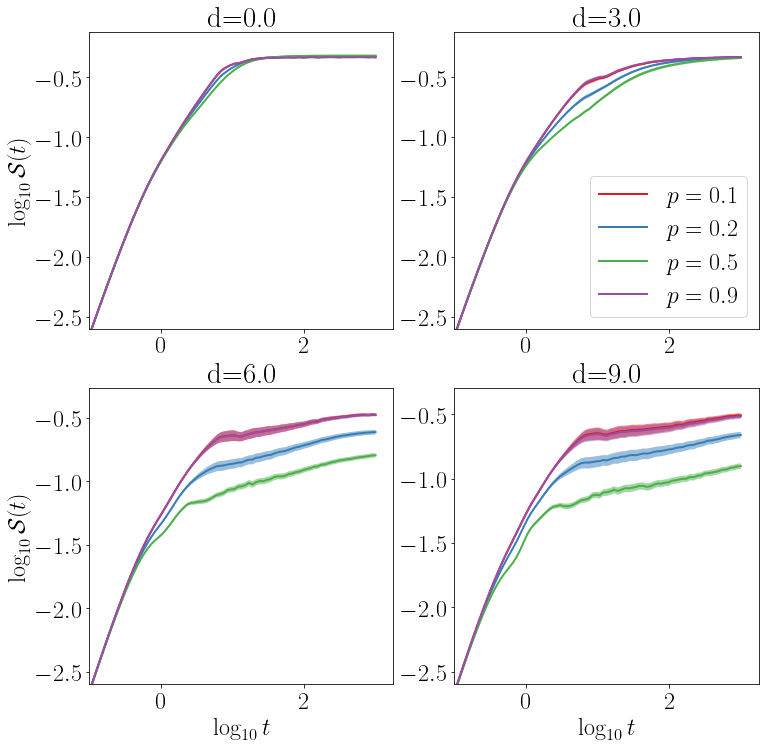

In [11]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,12)
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Set1.colors)

fig, axes = plt.subplots(2,2)
ax1,ax2 = axes[0]
bx1,bx2 = axes[1]
axlist=[ax1,ax2,bx1,bx2]

reps = 1024
dc = 0
for d in [0.0,3.0,6.0,9.0]:
    ax = axlist[dc]
    for L in [16]:
        for p in [0.1,0.2,0.5,0.9]:
            entlist = np.zeros((reps,100))
            cr_var_list = np.zeros(100)
            cr_var_list2 = np.zeros(100)
            for rep in range(reps):
                with h5py.File('data2/dataN%s/dyn-d%.2f-Jz%.2f-p%.2f-rep%s.h5' %(L,d,1.0,p,rep),'r') as hf:
                    ent = np.array(hf.get('ent'))
                    tlist = np.array(hf.get('tlist'))

                    entlist[rep] = ent.real

            entlist2 = np.mean(entlist,axis=0)
            varlist = np.var(entlist,axis=0)
            entlist = entlist2
            for v in range(len(varlist)):
                cr_var_list[v] = (entlist[v])+(varlist[v])
                cr_var_list2[v] = (entlist[v])-(varlist[v])

            ax.plot(np.log10(tlist),np.log10(np.abs(entlist)),'-',label=r'$p = %s$' %p,linewidth=2)
            ax.fill_between(np.log10(tlist),np.log10(np.abs(cr_var_list2)),np.log10(np.abs(cr_var_list)),alpha=0.5)

            ax.set(ylim=-2.6,xlim=-1,title=r'd=%.1f' %d)

    dc += 1 

ax1.set(ylabel=r'$\log_{10}\mathcal{S}(t)$')
bx1.set(ylabel=r'$\log_{10}\mathcal{S}(t)$')
bx1.set(xlabel=r'$\log_{10}t$')
bx2.set(xlabel=r'$\log_{10}t$')
ax2.legend(loc='lower right')
plt.savefig('Fig10.pdf',dpi=300,bbox_inches='tight')
plt.show()
plt.close()